# 数据预处理

### 查看数据头部、分割数据集

In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv("preprocess_train.csv")
# data.head()

# 分割数据集

X = data.drop(['label'], axis=1)
Y = data['label']

X

,sample_id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106
0,0,51.567250,288358.400000,NaN,1.855900,201.460169,6.582261,-0.516321,5.636771e+11,2.222212e+05,...,-14.701891,3.145963e+04,254.582034,0.0,-2.014506e+08,159.299350,0.603211,NaN,-5.256075,180.977310
1,1,63.804874,288358.400000,1.106802,1.050387,391.605375,13.323439,4.662871,NaN,-1.442474e+05,...,-8.959940,4.283053e+04,270.580779,0.0,-1.534970e+09,NaN,0.506220,0.552654,16.505952,314.783263
2,2,49.138527,288358.400000,1.111649,0.767127,130.708067,6.485547,5.696815,5.474603e+11,-4.288403e+05,...,32.159667,2.499632e+05,160.207067,0.0,7.998345e+08,112.632639,0.080100,0.235920,64.707581,183.304610
3,3,NaN,288358.400000,1.109169,NaN,258.521076,0.716737,23.238461,-3.539891e+11,NaN,...,1.815809,1.254783e+05,196.223295,0.0,-9.246920e+07,138.431470,2.548783,1.414810,-9.662399,212.302670
4,4,76.520831,288358.400000,1.113410,5.795408,256.038997,-1.803483,14.040495,-1.071014e+11,6.499723e+05,...,40.623904,1.862664e+05,179.083883,0.0,-6.796351e+08,259.858740,0.337643,0.228832,59.733069,135.541233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6291,6291,70.406112,288358.400000,1.098904,0.134016,222.782078,8.751254,21.783621,-9.018455e+11,-4.047841e+05,...,6.196076,5.235188e+04,217.577771,0.0,-9.042319e+06,203.750885,0.102876,2.385235,-3.557545,154.955008
6292,6292,72.795989,288358.400000,NaN,0.503558,408.101229,22.436609,5.631515,-2.376201e+11,-4.051203e+05,...,15.013753,NaN,178.635641,0.0,3.529909e+08,162.268924,0.824727,1.279274,-8.085779,231.487352
6293,6293,71.210154,515352.218703,2.101946,13.816881,-78.826173,111.744022,50.800576,5.065975e+12,4.996345e+06,...,95.670057,1.662894e+06,-76.537164,0.0,-7.378573e+08,137.228629,12.985847,0.143317,139.819816,-103.883245
6294,6294,NaN,288358.400000,1.106200,1.001885,218.883538,9.064199,9.285105,-2.020482e+10,-1.285311e+04,...,-1.409403,7.515669e+04,NaN,0.0,3.383887e+08,199.620984,0.476171,NaN,-30.718727,183.050026


### 补充缺失数据

In [23]:
# 补充 X 中的缺失值

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)
X = imputer.fit_transform(X)

# 归一化

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X

array([[0.00000000e+00, 1.73140199e-01, 6.01641926e-01, ...,
        2.03489255e-01, 2.11993579e-01, 1.66942976e-01],
       [1.58856235e-04, 1.97690145e-01, 6.01641926e-01, ...,
        1.81246419e-01, 2.83081473e-01, 2.45360165e-01],
       [3.17712470e-04, 1.68267928e-01, 6.01641926e-01, ...,
        1.66114747e-01, 4.40537049e-01, 1.68306894e-01],
       ...,
       [9.99682288e-01, 2.12545906e-01, 7.59664277e-01, ...,
        1.61690724e-01, 6.85898878e-01, 0.00000000e+00],
       [9.99841144e-01, 2.01971836e-01, 6.01641926e-01, ...,
        2.14021613e-01, 1.28817208e-01, 1.68157694e-01],
       [1.00000000e+00, 1.44736179e-01, 6.01641926e-01, ...,
        2.77329888e-01, 1.83934833e-01, 2.27642493e-01]])

 分割数据集


In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


#### 决策树

决策树分类器的准确率为：0.79
决策树分类器的精确率为：0.77
决策树分类器的召回率为：0.76
决策树分类器的F1值为：0.76


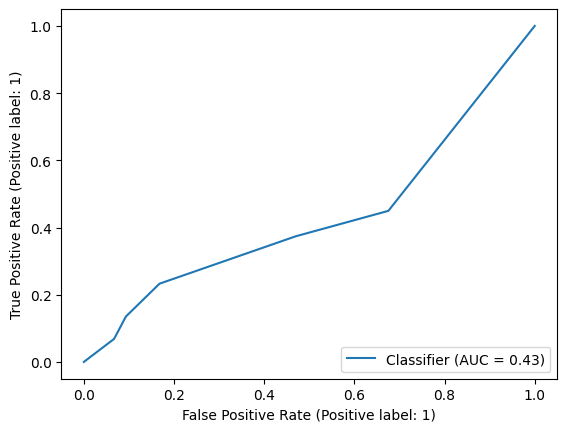

In [43]:
# 创建决策树分类器

from sklearn.metrics import RocCurveDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier()
# 训练决策树分类器
tree_clf.fit(X_train, y_train)
# 在测试集上进行预测
tree_pred = tree_clf.predict(X_test)
RocCurveDisplay.from_predictions(tree_pred == y_test , tree_pred)
# 计算预测准确率
tree_acc = accuracy_score(y_test, tree_pred)
tree_precision = precision_score(y_test, tree_pred, average='macro')
tree_recall = recall_score(y_test, tree_pred, average='macro')
tree_f1 = f1_score(y_test, tree_pred, average='macro')
print(f"决策树分类器的准确率为：{tree_acc:.2f}")
print(f"决策树分类器的精确率为：{tree_precision:.2f}")
print(f"决策树分类器的召回率为：{tree_recall:.2f}")
print(f"决策树分类器的F1值为：{tree_f1:.2f}") 




#### K近邻

In [44]:
# 创建k-近邻分类器
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
# 训练k-近邻分类器
knn_clf.fit(X_train, y_train)
# 在测试集上进行预测
knn_pred = knn_clf.predict(X_test)
# 计算预测准确率
knn_acc = accuracy_score(y_test, knn_pred)
knn_presicion = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

print(f"k-近邻分类器的准确率为：{knn_acc:.2f}")
print(f"k-近邻分类器的精确率为：{knn_presicion:.2f}")
print(f"k-近邻分类器的召回率为：{knn_recall:.2f}")
print(f"k-近邻分类器的F1值为：{knn_f1:.2f}")


k-近邻分类器的准确率为：0.62
k-近邻分类器的精确率为：0.62
k-近邻分类器的召回率为：0.40
k-近邻分类器的F1值为：0.45


#### 逻辑回归

In [31]:
# 创建逻辑回归分类器
from sklearn.linear_model import LogisticRegression


logistic_clf = LogisticRegression()
# 训练逻辑回归分类器
logistic_clf.fit(X_train, y_train)
# 在测试集上进行预测
logistic_pred = logistic_clf.predict(X_test)
# 计算预测准确率
logistic_acc = accuracy_score(y_test, logistic_pred)
logistic_presicion = precision_score(y_test, logistic_pred, average='macro')
logistic_recall = recall_score(y_test, logistic_pred, average='macro')
logistic_f1 = f1_score(y_test, logistic_pred, average='macro')

print(f"逻辑回归分类器的准确率为：{logistic_acc:.2f}")
print(f"逻辑回归分类器的精确率为：{logistic_presicion:.2f}")
print(f"逻辑回归分类器的召回率为：{logistic_recall:.2f}")
print(f"逻辑回归分类器的F1值为：{logistic_f1:.2f}")




逻辑回归分类器的准确率为：0.73
逻辑回归分类器的精确率为：0.84
逻辑回归分类器的召回率为：0.56
逻辑回归分类器的F1值为：0.63


c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 支持向量机

In [32]:
# 创建SVM分类器
from sklearn.svm import SVC


svm_clf = SVC()
# 训练SVM分类器
svm_clf.fit(X_train, y_train)
# 在测试集上进行预测
svm_pred = svm_clf.predict(X_test)
# 计算预测准确率
svm_acc = accuracy_score(y_test, svm_pred)
svm_presicion = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')

print(f"SVM分类器的准确率为：{svm_acc:.2f}")
print(f"SVM分类器的精确率为：{svm_presicion:.2f}")
print(f"SVM分类器的召回率为：{svm_recall:.2f}")
print(f"SVM分类器的F1值为：{svm_f1:.2f}")


SVM分类器的准确率为：0.76
SVM分类器的精确率为：0.87
SVM分类器的召回率为：0.60
SVM分类器的F1值为：0.65


#### AdaBoost

In [33]:
# 创建Adaboost分类器
from sklearn.ensemble import AdaBoostClassifier


adaboost_clf = AdaBoostClassifier()
# 训练Adaboost分类器
adaboost_clf.fit(X_train, y_train)
# 在测试集上进行预测
adaboost_pred = adaboost_clf.predict(X_test)
# 计算预测准确率
adaboost_acc = accuracy_score(y_test, adaboost_pred)
adaboost_presicion = precision_score(y_test, adaboost_pred, average='macro')
adaboost_recall = recall_score(y_test, adaboost_pred, average='macro')
adaboost_f1 = f1_score(y_test, adaboost_pred, average='macro')

print(f"Adaboost分类器的准确率为：{adaboost_acc:.2f}")
print(f"Adaboost分类器的精确率为：{adaboost_presicion:.2f}")
print(f"Adaboost分类器的召回率为：{adaboost_recall:.2f}")
print(f"Adaboost分类器的F1值为：{adaboost_f1:.2f}")



Adaboost分类器的准确率为：0.64
Adaboost分类器的精确率为：0.64
Adaboost分类器的召回率为：0.66
Adaboost分类器的F1值为：0.64


#### 随机森林

In [34]:
# 创建随机森林分类器
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier()
# 训练随机森林分类器
rf_clf.fit(X_train, y_train)
# 在测试集上进行预测
rf_pred = rf_clf.predict(X_test)
# 计算预测准确率
rf_acc = accuracy_score(y_test, rf_pred)
rf_presicion = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print(f"随机森林分类器的准确率为：{rf_acc:.2f}")
print(f"随机森林分类器的精确率为：{rf_presicion:.2f}")
print(f"随机森林分类器的召回率为：{rf_recall:.2f}")
print(f"随机森林分类器的F1值为：{rf_f1:.2f}")


随机森林分类器的准确率为：0.84
随机森林分类器的精确率为：0.88
随机森林分类器的召回率为：0.76
随机森林分类器的F1值为：0.81


### 投票

In [35]:
from sklearn.ensemble import VotingClassifier

# 创建决策树、k-近邻和逻辑回归分类器
tree_clf = DecisionTreeClassifier(max_depth=3)
knn_clf = KNeighborsClassifier(n_neighbors=3)
logistic_clf = LogisticRegression()

# 创建投票分类器
voting_clf = VotingClassifier(
    estimators=[('tree', tree_clf), ('knn', knn_clf),
                ('logistic', logistic_clf)],
    voting='hard'
)

# 训练投票分类器
voting_clf.fit(X_train, y_train)

# 在测试集上进行预测
voting_pred = voting_clf.predict(X_test)
# 计算预测准确率
voting_acc = accuracy_score(y_test, voting_pred)
voting_presicion = precision_score(y_test, voting_pred, average='macro')
voting_recall = recall_score(y_test, voting_pred, average='macro')
voting_f1 = f1_score(y_test, voting_pred, average='macro')
print(f"投票分类器的准确率为：{voting_acc:.2f}")
print(f"投票分类器的精确率为：{voting_presicion:.2f}")
print(f"投票分类器的召回率为：{voting_recall:.2f}")
print(f"投票分类器的F1值为：{voting_f1:.2f}")


c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


投票分类器的准确率为：0.67
投票分类器的精确率为：0.89
投票分类器的召回率为：0.43
投票分类器的F1值为：0.48


### 绘制ROC曲线

In [38]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

tree_fpr, tree_tpr, tree_thresholds = roc_curve(
    y_test, tree_clf.predict_proba(X_test)[:, 1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(
    y_test, knn_clf.predict_proba(X_test)[:, 1])
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(
    y_test, logistic_clf.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(
    y_test, svm_clf.predict_proba(X_test)[:, 1])
plt.plot(tree_fpr, tree_tpr, label='Decision Tree')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression')
plt.plot(svm_fpr, svm_tpr, label='SVM')


plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# 显示图形
plt.show()


ValueError: multiclass format is not supported